<a href="https://colab.research.google.com/github/sakhnos/Paper4_Plasma/blob/master/Plasma_W()_exp_normalized_T(z).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

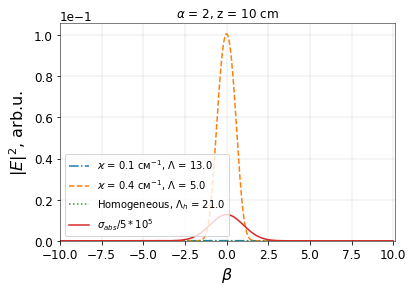

In [76]:
%reset -f 
import numpy as np
import math
from scipy.integrate import odeint
#from numpy import linspace, array
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter  

# With Lisitsa V.S. Dimensionless  quared Fourier transform for Gaussian pulse at different distance of propagation
# z and optical thickness L (Kappa in the figure).
c = 137
aB = 0.52 * 10 ** (-8) # Bohr's radius in cm

def sigma_abs(w, wik, f0, delta, M):  # DONE!!!!
    return (2 * np.pi ** 2 / c) * f0 * Doppler(w, wik, delta, M) # Doppler() === G()
#

def N(z, kappa, za, zb, N0):# concentration profile
   return N0  * (np.exp(-kappa * (z - za)) + np.exp(kappa * (z - zb)))  / (1 + np.exp(-kappa * (zb - za)))

def T_Vshape(z): # non-uniform temperature distribution
    if (z <= 50):
        return (1.6 * z + 10) / 27.2          # z[cm], T(z)[at.u.]
    else:
        return (-1.6 * (z-100) + 10)  / 27.2  # z[cm], T(z)[at. u.]

def delta_wik(z, wik, M): # DONE!!!!!!
    T = T_Vshape(z)
    return np.sqrt(T/M) * (wik / c)

def Doppler(w, wik, delta, M):  # DONE!!!!!!    
    return  np.exp( -((w - wik) ** 2) / (2 * (delta ** 2))) / (delta * np.sqrt(2 * np.pi))    

                 
def Gmax(delta): # delta schitaetsa v funkzii W pri zadannom z
    return 1 / ((np.sqrt(2 * np.pi)) * delta)
             
def sigma_abs_max(delta, f0):
    return (2 * np.pi ** 2 * f0 * Gmax(delta)) / c

def Lkappa(delta, f0, N0, z, kappa, za, zb): # optical thickness L
    zz = np.arange(za, z, 0.0005)
    val = np.zeros(len(zz))
    for i in range(len(zz)): 
         val[i] = N(zz[i], kappa, za, zb, N0)    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    integral = np.trapz(val, zz)
    return sigma_abs_max(delta, f0) * (aB) ** 2 * integral 
  
def E2FourL(beta, delta, alpha, kappa, w0, za, zb, z, E0, N0, f0, M, delta_small): # with optical thickness L
    LkappaVal = Lkappa(delta, f0, N0, z, kappa, za, zb)
    F2L = np.zeros(len(beta))   
    for i in range(len(beta)):    
        F2L[i] = E0 ** 2 * (np.pi/2) * (alpha ** 2 / delta ** 2) * np.exp(-(beta[i] - delta_small) ** 2 * alpha ** 2 - \
             LkappaVal * Doppler(w0 + delta * beta[i], w0, delta, M) / Gmax(delta) )   # Doppler() === G()
            #def f(z, kappa, za, zb): 
    return F2L
  
  
### Homogenious functions BEGIN ###  
def Lkappa_homo(delta, f0, N0, z, za): # optical thickness L for homogenious plasma
    return sigma_abs_max(delta, f0) * (aB) ** 2 * N0 * (z - za)
  
def E2FourL_homo(beta, delta, alpha, w0, za, z, E0, N0, f0, M, delta_small): # with optical thickness L
    LkappaValHomo = Lkappa_homo(delta, f0, N0, z, za)
    F2LHomo = np.zeros(len(beta))
    for i in range(len(beta)):
        F2LHomo[i] = E0 ** 2 * (np.pi/2) * (alpha ** 2 / delta ** 2) * np.exp(-(beta[i] - delta_small) ** 2 * alpha ** 2 -
            LkappaValHomo * Doppler(w0 + delta * beta[i], w0, delta, M) / Gmax(delta) )   # Doppler() === G()
    return F2LHomo  
    
def W_homo(beta, alpha, delta, z, za, w0, f0, E0, M, N0, delta_small):
    a = (np.pi/4) * f0 * E0 ** 2 * alpha ** 2 / (w0 * delta)
    J = np.zeros(len(beta))
    for i in range(len(beta)):
       J[i] = Doppler(w0 + delta * beta[i], w0, delta, M) * np.exp(-(beta[i] - delta_small) ** 2 * alpha ** 2 - Lkappa_homo(delta, f0, N0, z, za) *
                     Doppler(w0 + delta * beta[i], w0, delta, M) / Gmax(delta))
    integral = a * np.trapz(J, beta)
    return integral  
  ### Homogenious functions END ###
  
def LKappaVis():  # DONE!!!!!!!!!!!!!!!!!!!!!!
    w0 = 10.199 / 27.2 # 10.199 alfa, 12.094 - beta
    f0 = 0.416
    M = 1828
    N0 = 2 * 10 ** 14
    kappa = 0.4
    za = 0
    zb = 100 
    z = np.arange(0, 100, 5)
    val = np.zeros(len(z))
    valHomo = np.zeros(len(z))
    for i in range(len(z)): 
        delta = delta_wik(z[i], w0, M)
        #print(delta)
        val[i] = Lkappa(delta, f0, N0, z[i], kappa, za, zb)    
        valHomo[i] = Lkappa_homo(delta, f0, N0, z[i], za)
    fig = plt.figure()
    fig.patch.set_facecolor('xkcd:white') # outer color
    plt.plot(z, val,'-.')
    plt.plot(z, valHomo, ':')
    ax = plt.gca()
    ax.set_facecolor((1.0, 1.0, 1.0))    # background color
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['bottom'].set_color('0.0') 
    ax.spines['top'].set_linewidth(0.5)
    ax.spines['top'].set_color('0.0') 
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['left'].set_color('0.0') 
    ax.spines['right'].set_linewidth(0.5)
    ax.spines['right'].set_color('0.0') 
    ax.grid(b=True, which='major', axis='both', color = 'k', linestyle=':', linewidth=0.2)
    plt.xlabel(r'z, cm',  {'color': 'k', 'fontsize': 16})
    plt.ylabel(r'LKappa', {'color': 'k', 'fontsize': 16})
 #  plt.title(r'$\alpha$ = ' + str(alpha) + str(" cm-1, ") + "z = " + str(z1) + " cm")
    plt.ticklabel_format(style='sci', axis='y', scilimits=(2, 3), useOffset=False)
    plt.show()
    return 0

def E2FourL_visualisation(): # DONE!!!!!
    beta = np.arange(-10, 10, 0.01)
    alpha = 2
    kappa1 = 0.1
    kappa2 = 0.4
    za = 0
    zb = 100
    E0 = 10 ** (-4)
    N0 = 2 * 10 ** 14  # my own profile 14
    w0 = 10.199 / 27.2 # 10.199 alfa, 12.094 - beta
    f0 = 0.416
    M = 1828
    z1 = 10  # distance
    delta_small = 0
    delta =  delta_wik(z1, w0, M)  # width of line    # at T = 10 eV width of line = 3.881 * 10 ** (-5) at.u.

    E2F_1 = E2FourL(beta, delta, alpha, kappa1, w0, za, zb, z1, E0, N0, f0, M, delta_small)          
    E2F_2 = E2FourL(beta, delta, alpha, kappa2, w0, za, zb, z1, E0, N0, f0, M, delta_small)        
    E2F_homo = E2FourL_homo(beta, delta, alpha, w0, za,     z1, E0, N0, f0, M, delta_small)
    
    sigAbs = np.zeros(len(beta))
    for i in range(len(beta)):
      sigAbs[i] =   Doppler(w0 + delta * beta[i], w0, delta, M) /  (5 * 10 ** 5)
             
    fig = plt.figure()
    fig.patch.set_facecolor('xkcd:white') # outer color
    plt.plot(beta, E2F_1,'-.')
    plt.plot(beta, E2F_2,'--')
    plt.plot(beta, E2F_homo,':')
    plt.plot(beta, sigAbs,'')
    ax = plt.gca()
    ax.set_facecolor((1.0, 1.0, 1.0))    # background color
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['bottom'].set_color('0.0') 
    ax.spines['top'].set_linewidth(0.5)
    ax.spines['top'].set_color('0.0') 
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['left'].set_color('0.0') 
    ax.spines['right'].set_linewidth(0.5)
    ax.spines['right'].set_color('0.0') 
    ax.grid(b=True, which='major', axis='both', color = 'k', linestyle=':', linewidth=0.2)
    plt.xlabel(r'$\beta$',  {'color': 'k', 'fontsize': 16})
    plt.ylabel(r'$|E|^2$, arb.u.', {'color': 'k', 'fontsize': 16})
    plt.title(r'$\alpha$ = ' + str(alpha) + str(", ") + "z = " + str(z1) + " cm")
    plt.ticklabel_format(style='sci', axis='y', scilimits=(2, 3), useOffset=False)
    plt.legend([r"$\varkappa$ = " + str(kappa1) + str(" см$^{-1}$, ") + r'$\Lambda$ = ' + str(round(Lkappa(delta, f0, N0, z1, kappa1, za, zb))),
                r"$\varkappa$ = " + str(kappa2) + str(" см$^{-1}$, ") + r'$\Lambda$ = ' + str(round(Lkappa(delta, f0, N0, z1, kappa2, za, zb))),
                r"Homogeneous, " + r'$\Lambda_h$ = ' + str(round(Lkappa_homo(delta, f0, N0, z1, za))),
               "$\sigma_{abs}/ 5 * 10^5$"], loc='lower left', fontsize = 10) # loc='best' 
    plt.ylim(0)
    plt.xlim(beta[0], beta[len(beta) - 1]+0.1)
    ax.yaxis.get_offset_text().set_fontsize(12) # size of the power in sci lim 
    for tick in ax.yaxis.get_major_ticks(): # size of numbers of Y-axia
        tick.label.set_fontsize(12) 
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12) 
    plt.show()
    return


def concentration_visualisation():    
    zb = 100 
    za = 0
    N0 = 2 * 10 ** 14  # my own profile 14 
    z = np.arange(0, 100, 0.1)
    F1 = np.zeros(len(z))
    F2 = np.zeros(len(z))
    F3 = np.zeros(len(z)) 
    
    kappa1 = 0.05  #0.1
    kappa2 = 0.1  #0.2
    kappa3 = 0.4  # 0.5     # N(z, kappa, z0, d, N0):# concentration profile
        
    #N(z, kappa, za, zb, N0)
    for i in range(len(z)):
        F1[i] = N(z[i], kappa1, za, zb, N0)
        
    for i in range(len(z)):
        F2[i] = N(z[i], kappa2, za, zb, N0)
        
    for i in range(len(z)):
        F3[i] = N(z[i], kappa3, za, zb, N0)
    
    
    fig = plt.figure()
    fig.patch.set_facecolor('xkcd:white') # outer color
    plt.plot([za, zb], [N0, N0],'-.') 
    plt.plot(z, F1,'')
    plt.plot(z, F2,'--')
    plt.plot(z, F3,':')   
    ax = plt.gca()
    ax.set_facecolor((1.0, 1.0, 1.0))    # background color
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['bottom'].set_color('0.0') 
    ax.spines['top'].set_linewidth(0.5)
    ax.spines['top'].set_color('0.0') 
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['left'].set_color('0.0') 
    ax.spines['right'].set_linewidth(0.5)
    ax.spines['right'].set_color('0.0') 
    ax.grid(b=True, which='major', axis='both', color = 'k', linestyle=':', linewidth=0.2)
    plt.xlabel(r'z, cm',  {'color': 'k', 'fontsize': 16})
    plt.ylabel(r'N(z), cm$^{-3}$', {'color': 'k', 'fontsize': 16})
 #  plt.title(r'$\alpha$ = ' + str(alpha) + str(" cm-1, ") + "z = " + str(z1) + " cm")
    plt.ticklabel_format(style='sci', axis='y', scilimits=(2, 3), useOffset=False)
    plt.legend([r"Homogeneous", r"$\varkappa$ = " + str(kappa1) + str(" см$^{-1}$, "), r"$\varkappa$ = " + str(kappa2) + str(" см$^{-1}$, "),
                r"$\varkappa$ = " + str(kappa3) + str(" см$^{-1}$")], loc='best', fontsize = 13)
    plt.ylim(0)
    plt.xlim(z[0], z[len(z) - 1]+0.1)
    ax.yaxis.get_offset_text().set_fontsize(12) # size of the power in sci lim 
    for tick in ax.yaxis.get_major_ticks(): # size of numbers of Y-axia
        tick.label.set_fontsize(12) 
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12) 
    plt.show()
    return

  
#concentration_visualisation() 
#LKappaVis()
E2FourL_visualisation() # spectra visualisation

integration step = 0.013337779259753546


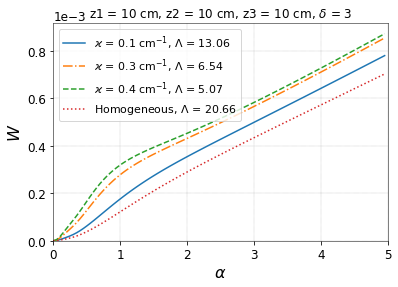

In [94]:
def W(beta, alpha, delta, z, kappa, za, zb, w0, f0, E0, M, N0, delta_small):
    a = (np.pi/4) * f0 * E0 ** 2 * alpha ** 2 / (w0 * delta)
    LkappaVal = Lkappa(delta, f0, N0, z, kappa, za, zb) 
    J = np.zeros(len(beta))
    for i in range(len(beta)):
       J[i] = Doppler(w0 + delta * beta[i], w0, delta, M) * np.exp(-(beta[i] - delta_small) ** 2 * alpha ** 2 -\
                                                               LkappaVal *  Doppler(w0 + delta * beta[i], w0, delta, M) / Gmax(delta))
    integral = a * np.trapz(J, beta)
    return integral

def W_visualisation():
    alpha = np.arange(0, 5, 0.05)    # 0.05
    beta = np.linspace(-20, 20, 3000)
    print(r"integration step = " + str(beta[1]-beta[0]))
    #kappa = 0.0000000001  # 0.01
    za = 0
    zb = 100
    E0 = 10 ** (-5)
    N0 = 2 * 10 ** 14  # my own profile 14
    w0 = 10.199 / 27.2   # 10.199 alfa, 12.094 - beta
    f0 = 0.416
    M = 1828
    
    z = 10   # 2 
    zh = z # for homogenious case
    z1 = z
    z2 = z
    z3 = z
    delta = delta_wik(z, w0, M) # temperature dependent width of line
    delta_small = 3 # 3 or 5    #frequency detuning

    
    kappa1 = 0.1  # 0.05
    kappa2 = 0.3  # 0.1
    kappa3 = 0.4   # 0.2

    W1 = np.zeros(len(alpha))
    W2 = np.zeros(len(alpha))
    W3 = np.zeros(len(alpha))
    Wh = np.zeros(len(alpha))
    
    fig = plt.figure()
    fig.patch.set_facecolor('xkcd:white') # outer color

    for i in range(len(alpha)): # def W(beta, alpha, delta, z, kappa,      za, zb, w0, f0, E0, T, M, N0, delta_small):
        W1[i] = W(beta, alpha[i], delta, z1, kappa1, za, zb, w0, f0, E0, M, N0, delta_small)
    plt.plot(alpha, W1, '')

    for i in range(len(alpha)): # W(beta, alpha, delta, z, kappa, d, w0, f0, E0, T, M, N0):
        W2[i] = W(beta, alpha[i], delta, z2, kappa2, za, zb, w0, f0, E0, M, N0, delta_small)
    plt.plot(alpha, W2, '-.')

    for i in range(len(alpha)): # W(beta, alpha, delta, z, kappa, d, w0, f0, E0, T, M, N0):
        W3[i] = W(beta, alpha[i], delta, z3, kappa3, za, zb, w0, f0, E0, M, N0, delta_small)
    plt.plot(alpha, W3, '--')
    
    for i in range(len(alpha)): # W_homo(beta, alpha[i], delta, z, d, w0, f0, E0, T, M, N0, delta_small):
        Wh[i] = W_homo(beta, alpha[i], delta, z, za, w0, f0, E0, M, N0, delta_small)

    plt.plot(alpha, Wh, ':')

    plt.xlabel(r'$\alpha$', {'color': 'k', 'fontsize': 16})
    plt.ylabel(r'$W$', {'color': 'k', 'fontsize': 16})
 ###   plt.title(r'$\Lambda$ = ' + str(round(Lkappa(delta, f0, N0, z1, kappa1, d))))

    plt.legend([r"$\varkappa$ = " + str(kappa1) + str(" cm$^{-1}$, ") + r'$\Lambda$ = ' + str(round(Lkappa(delta, f0, N0, z, kappa1, za, zb), 2)),
                r"$\varkappa$ = " + str(kappa2) + str(" cm$^{-1}$, ") + r'$\Lambda$ = ' + str(round(Lkappa(delta, f0, N0, z, kappa2, za, zb), 2)),
                r"$\varkappa$ = " + str(kappa3) + str(" cm$^{-1}$, ") + r'$\Lambda$ = ' + str(round(Lkappa(delta, f0, N0, z, kappa3, za, zb), 2)),
               r"Homogeneous, "+ r'$\Lambda$ = ' + str(round(Lkappa_homo(delta, f0, N0, z, za), 2)) ], loc='best', fontsize = 11)
                                                    
                                                                                               #Lkappa(delta, f0, N0, z, kappa, za, zb)
    ax = plt.gca()
    # ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places
    ax.set_facecolor((1.0, 1.0, 1.0))    # background color
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['bottom'].set_color('0.0') 
    ax.spines['top'].set_linewidth(0.5)
    ax.spines['top'].set_color('0.0') 
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['left'].set_color('0.0') 
    ax.spines['right'].set_linewidth(0.5)
    ax.spines['right'].set_color('0.0') 
    ax.grid(b=True, which='major', axis='both', color = 'k', linestyle=':', linewidth=0.2)
    plt.xlim(0, alpha[-1] + alpha[1] - alpha[0], auto = True)    # + alpha[1] - alpha[0]
    for tick in ax.yaxis.get_major_ticks(): # size of numbers of Y-axia
        tick.label.set_fontsize(12) 
    for tick in ax.xaxis.get_major_ticks(): 
        tick.label.set_fontsize(12)  
        #ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places
    plt.ylim(0)   # round(Lkappa(delta, f0, N0, z1, kappa1, d))
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0), useOffset=False)
    ax.yaxis.get_offset_text().set_fontsize(12) # size of the power in sci lim 
    plt.title("z1 = " + str(z1) + " cm, " "z2 = " + str(z2) + " cm, " + "z3 = " + str(z3) + " cm, " +  "$\delta$ = " + str(delta_small))
    plt.show()

W_visualisation() 
